In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('Loan_default.csv')
df_encoded = df.copy()
label_encoder = LabelEncoder()


boolean_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for column in boolean_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


categorical_columns = ['Education', 'EmploymentType', 'LoanPurpose', 'MaritalStatus']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns)

corr_matrix = df_encoded.corr(numeric_only=True)

In [3]:
correlation_with_default = corr_matrix['Default'].sort_values(ascending=False)
correlation_with_default = correlation_with_default[correlation_with_default.index != 'Default']
correlation_with_default_sorted = correlation_with_default.sort_values(ascending=False)
correlation_with_default_sorted

InterestRate                    0.131273
LoanAmount                      0.086659
EmploymentType_Unemployed       0.034957
NumCreditLines                  0.028330
Education_High School           0.022831
MaritalStatus_Divorced          0.020290
DTIRatio                        0.019236
LoanPurpose_Business            0.011162
Education_Bachelor's            0.008848
MaritalStatus_Single            0.006607
EmploymentType_Part-time        0.006372
LoanPurpose_Auto                0.004181
LoanPurpose_Education           0.003512
LoanPurpose_Other               0.002737
LoanTerm                        0.000545
EmploymentType_Self-employed   -0.002714
Education_Master's             -0.013314
Education_PhD                  -0.018447
LoanPurpose_Home               -0.021564
HasMortgage                    -0.022856
MaritalStatus_Married          -0.026875
CreditScore                    -0.034166
HasDependents                  -0.034678
EmploymentType_Full-time       -0.038662
HasCoSigner     

In [4]:
X = df_encoded.drop(['LoanID', 'Default'], axis=1)  
y = df_encoded['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = GaussianNB()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8858037987076561


In [6]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[45015   155]
 [ 5677   223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.59      0.04      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070



In [7]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   LoanID                        255347 non-null  object 
 1   Age                           255347 non-null  int64  
 2   Income                        255347 non-null  int64  
 3   LoanAmount                    255347 non-null  int64  
 4   CreditScore                   255347 non-null  int64  
 5   MonthsEmployed                255347 non-null  int64  
 6   NumCreditLines                255347 non-null  int64  
 7   InterestRate                  255347 non-null  float64
 8   LoanTerm                      255347 non-null  int64  
 9   DTIRatio                      255347 non-null  float64
 10  HasMortgage                   255347 non-null  int32  
 11  HasDependents                 255347 non-null  int32  
 12  HasCoSigner                   255347 non-nul

In [8]:
X = df_encoded.drop(['LoanID', 'Default','LoanTerm','EmploymentType_Self-employed','LoanPurpose_Other','LoanPurpose_Education','LoanPurpose_Auto','EmploymentType_Part-time','MaritalStatus_Single',"Education_Bachelor's"], axis=1)  
y = df_encoded['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = GaussianNB()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8859017035441551


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[45021   149]
 [ 5678   222]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.60      0.04      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070



In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        255347 non-null  int64  
 1   Income                     255347 non-null  int64  
 2   LoanAmount                 255347 non-null  int64  
 3   CreditScore                255347 non-null  int64  
 4   MonthsEmployed             255347 non-null  int64  
 5   NumCreditLines             255347 non-null  int64  
 6   InterestRate               255347 non-null  float64
 7   DTIRatio                   255347 non-null  float64
 8   HasMortgage                255347 non-null  int32  
 9   HasDependents              255347 non-null  int32  
 10  HasCoSigner                255347 non-null  int32  
 11  Education_High School      255347 non-null  uint8  
 12  Education_Master's         255347 non-null  uint8  
 13  Education_PhD              25

In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 255347 entries, 0 to 255346
Series name: Default
Non-Null Count   Dtype
--------------   -----
255347 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [44]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]
i=0.2
accuracy_max = 0
threshold_max = 0
while i<0.5:
    threshold = i
    y_pred = (y_prob > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if(accuracy_max<accuracy):
        threshold_max = threshold
    i +=0.01

threshold = threshold_max
y_pred = (y_prob > threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Threshold: {threshold}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Threshold: 0.49000000000000027
Accuracy: 0.8857058938711573
Confusion Matrix:
[[45023   147]
 [ 5690   210]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.59      0.04      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070



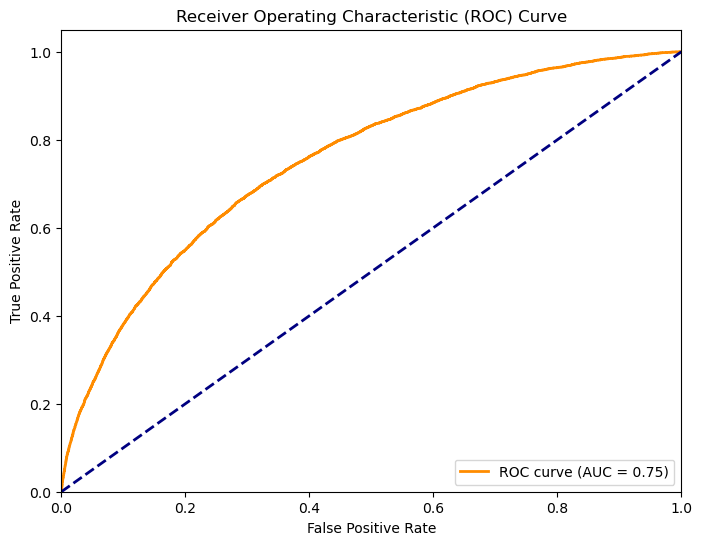

In [15]:
from sklearn.metrics import roc_curve, auc

y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]


threshold = 0.5
y_pred_adjusted = (y_prob > threshold).astype(int)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [35]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


input_dim = X_train_scaled.shape[1]
encoding_dim = 32 
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)


autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=25, batch_size=256, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))


encoder_output_train = autoencoder.predict(X_train_scaled)
encoder_output_test = autoencoder.predict(X_test_scaled)

Epoch 1/25
798/798 [==============================] - 1s 1ms/step - loss: 0.6780 - val_loss: 0.5065
Epoch 2/25
798/798 [==============================] - 1s 964us/step - loss: 0.4897 - val_loss: 0.4808
Epoch 3/25
798/798 [==============================] - 1s 967us/step - loss: 0.4768 - val_loss: 0.4741
Epoch 4/25
798/798 [==============================] - 1s 1ms/step - loss: 0.4721 - val_loss: 0.4707
Epoch 5/25
798/798 [==============================] - 1s 985us/step - loss: 0.4696 - val_loss: 0.4687
Epoch 6/25
798/798 [==============================] - 1s 980us/step - loss: 0.4680 - val_loss: 0.4675
Epoch 7/25
798/798 [==============================] - 1s 1ms/step - loss: 0.4670 - val_loss: 0.4667
Epoch 8/25
798/798 [==============================] - 1s 1ms/step - loss: 0.4664 - val_loss: 0.4662
Epoch 9/25
798/798 [==============================] - 1s 1ms/step - loss: 0.4660 - val_loss: 0.4659
Epoch 10/25
798/798 [==============================] - 1s 1ms/step - loss: 0.4658 - val_loss

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(encoder_output_train, y_train)


y_pred = knn_model.predict(encoder_output_test)

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')

Confusion Matrix:
[[40190  4980]
 [ 4886  1014]]
Accuracy: 0.8068141766203251


In [41]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     45170
           1       0.17      0.17      0.17      5900

    accuracy                           0.81     51070
   macro avg       0.53      0.53      0.53     51070
weighted avg       0.81      0.81      0.81     51070

